# Just how big is the U.S. public pensions crisis?

It is sometimes reported in the news that the U.S. is facing a pensions crisis. How big are these obligations, how quickly are the liabilities growing, and which states have biggest problem?

## The data

The data I am using comes from [Kaggle](https://www.kaggle.com/meepbobeep/us-public-pensions-data-fiscal-years-20012016/version/6#PPD_PlanLevel.csv). The dataset covers 95% of public pension membership and assets nationwide and provides a large amount of information on 180 pension schemes for the fiscal years from 2001 to 2017. The data originally came from [publicplansdata.org](publicplansdata.org) which is maintained by several organizations including the Center for Retirement Research at Boston College. 

## Exploring the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pensions = pd.read_csv("~/Documents/Thinkful/Unit4/PPD_PlanLevel.csv.zip", compression = 'zip')

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (5,111) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The dataset contains information on 180 different pension schemes over 17 years. The graph below shows that the dataset contains information for all 17 years for the vast majority of the pension schemes.

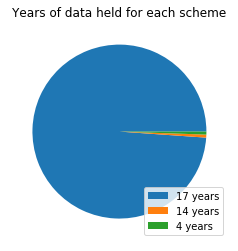

In [3]:
num_yrs = pensions.PlanName.value_counts()
count_num_yrs = num_yrs.value_counts()
plt.pie(count_num_yrs)
plt.title("Years of data held for each scheme")
plt.legend(["17 years", "14 years", "4 years"], loc='lower right')
plt.show()

The data breaks down the pension schemes by state. The graph below shows the number of pension schemes in the data attributable to each state for the most recent year, 2017.

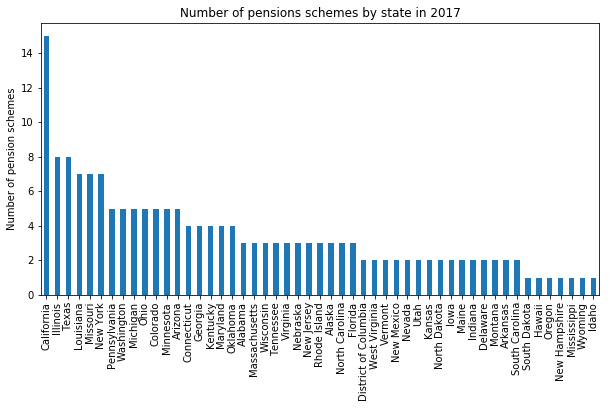

In [4]:
pensions_2017 = pensions.loc[pensions['fy'] == 2017,]
pensions_2017['StateName'].value_counts().plot(kind='bar', figsize=(10,5))
plt.ylabel("Number of pension schemes")
plt.title("Number of pensions schemes by state in 2017")
plt.show()

The size of each pension scheme can be judged by the ActLiabilities_GASB variable. This variable indicates the total size of the future pension obligations owed by each pension scheme as reported in its financial accounts. It is recalculated every year to take account of new liabilities and changes in economic assumptions. The graph below shows the size of the liabilities for all pension schemes calculated in 2017.

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


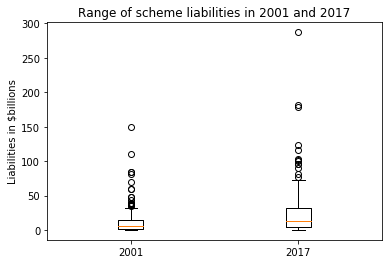

In [5]:
pensions_2017_clean = pensions_2017.dropna(subset=['ActLiabilities_GASB'])
pensions_2017_clean['ActLiabilities_GASB'] = pensions_2017_clean['ActLiabilities_GASB'] / 1000000 # Change to billions (originally in thousands)

pensions_2001 = pensions[pensions['fy'] == 2001]
pensions_2001_clean = pensions_2001.dropna(subset=['ActLiabilities_GASB'])
pensions_2001_clean['ActLiabilities_GASB'] = pensions_2001_clean['ActLiabilities_GASB'] / 1000000
plt.boxplot([pensions_2001_clean['ActLiabilities_GASB'], pensions_2017_clean['ActLiabilities_GASB']])
plt.ylabel("Liabilities in $billions")
plt.title("Range of scheme liabilities in 2001 and 2017")
plt.xticks([1, 2], ["2001", "2017"])
plt.show()

The boxplots show that the range of liabilities has grown over 17 years, and the largest single liability has almost doubled (though it is not certain it is the same scheme from this graph). In 2017, half the schemes have liabilities below around \\$20 billion, but the other half have a significantly larger range of liabilities, up to around \\$286 billion. 

The tables below highlight additional details about these ranges.

In [6]:
pensions_2001_clean['ActLiabilities_GASB'].describe()

count    167.000000
mean      12.743412
std       20.612798
min        0.254255
25%        1.584265
50%        5.528026
75%       14.262434
max      149.155000
Name: ActLiabilities_GASB, dtype: float64

In [7]:
pensions_2017_clean['ActLiabilities_GASB'].describe()

count    143.000000
mean      26.371988
std       38.944828
min        0.596730
25%        3.782112
50%       13.152274
75%       32.679894
max      286.950000
Name: ActLiabilities_GASB, dtype: float64

It is not just that the size of the schemes, in terms of the obligations owed, have got larger. Over the same period of time the funded ratios have dropped, meaning that the schemes hold a smaller proportion of assets to back the liabilities in 2017 compared to 2001.

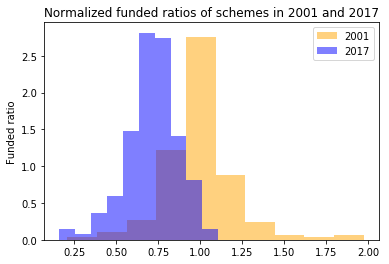

In [8]:
plt.hist(pensions_2001.dropna(subset=['ActFundedRatio_GASB'])['ActFundedRatio_GASB'], color='orange', alpha=.5, density=True)
plt.hist(pensions_2017.dropna(subset=['ActFundedRatio_GASB'])['ActFundedRatio_GASB'], color='blue', alpha=0.5, density=True)
plt.title("Normalized funded ratios of schemes in 2001 and 2017")
plt.legend(["2001", "2017"])
plt.ylabel("Funded ratio")
plt.show()

## Analytic Questions

### How big is the pensions problem?
The pensions crisis has come about because of the size of the <i>unfunded</i> pension liabilities. In other words, pension schemes are usually sustainable as long as the amount of assets held by the scheme roughly matches the size of the liabilities.

To see how big the pensions problem is I need to calculate the total size of the unfunded liabilities over time. To make sure it is a fair comparison it is important to make sure that the same pension schemes are included in all years, and any schemes with data missing for one year are excluded.

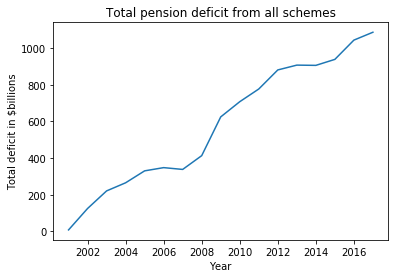

In [9]:
deficits = pensions.loc[:, ['PlanName', 'fy', 'StateAbbrev', 'UAAL_GASB']]
deficits_2 = deficits.pivot(index='PlanName', columns='fy', values='UAAL_GASB')
deficits_2.dropna(inplace=True)
deficits_2.loc['Total'] = deficits_2.sum()
deficits_2 = deficits_2.T

plt.plot(deficits_2.Total / 1000000) # Convert to billions (in thousands)
plt.xlabel("Year")
plt.ylabel("Total deficit in $billions")
plt.title("Total pension deficit from all schemes")
plt.show()

### Which states have seen the largest increases in liabilities?

To answer this question I need to calculate the total liabilities in each state in 2001 and 2017. To make sure it is a fair comparison it is important to make sure that the same pension schemes are included in both years, and any schemes with data in only one year are excluded.

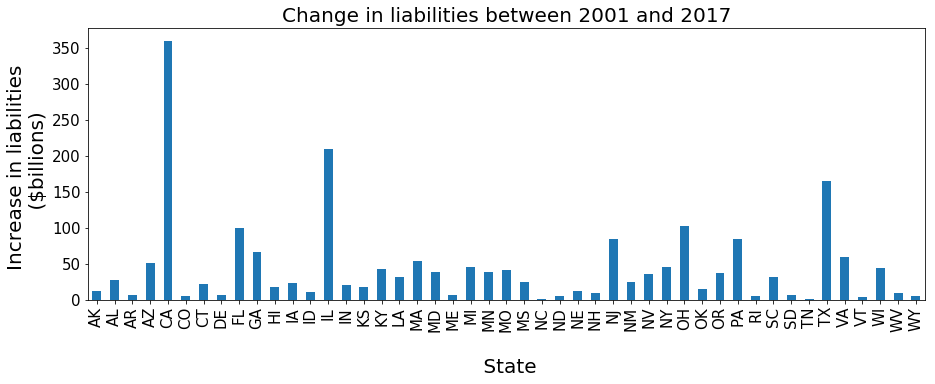

In [10]:
# Slice out the years required
years = [2001, 2017]
pensions_01_17 = pensions[pensions.fy.isin(years)]

# Remove schemes which do not have data for one or both years
pensions_01_17 = pensions_01_17.dropna(subset = ['ActLiabilities_GASB'])
counts = pd.DataFrame(pensions_01_17.PlanName.value_counts())
in_both = counts[counts['PlanName'] > 1]
in_both_list = list(in_both.index)
pensions_01_17 = pensions_01_17[pensions_01_17.PlanName.isin(in_both_list)]

# Reshape data to make comparisons between years easier
pensions_01 = pensions_01_17[pensions_01_17['fy'] == 2001]
pensions_17 = pensions_01_17[pensions_01_17['fy'] == 2017]
liabs_01 = pd.DataFrame(pensions_01.groupby('StateAbbrev')['ActLiabilities_GASB'].sum())
liabs_17 = pd.DataFrame(pensions_17.groupby('StateAbbrev')['ActLiabilities_GASB'].sum())
liabs_01_17 = pd.DataFrame(index = liabs_01.index)
liabs_01_17['Liabs_2001'] = liabs_01['ActLiabilities_GASB'] / 1000000 #Change to billions
liabs_01_17['Liabs_2017'] = liabs_17['ActLiabilities_GASB'] / 1000000 #Originally in thousands

# Find change in liabilities and plot
liabs_01_17['Liabs_change'] = liabs_01_17['Liabs_2017'] - liabs_01_17['Liabs_2001']
liabs_01_17.Liabs_change.plot(kind='bar', figsize=(15,5))
plt.title("Change in liabilities between 2001 and 2017", fontsize=20)
plt.ylabel("Increase in liabilities \n ($billions)", fontsize=20)
plt.xlabel("\n State", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

The three states to have seen the largest increase in liability amounts are California, Illinois and Texas. These are the same three states with largest number of pension schemes in 2017, so this is perhaps not particularly surprising. Of the next largest, Florida may be a cause for concern as it has seen the 5th largest increase over this time, but it only has 3 pension schemes (18 states have a larger number of schemes). To see whether there are any other states with similar concerns the graph below shows the increase in liabilities per scheme in each state.

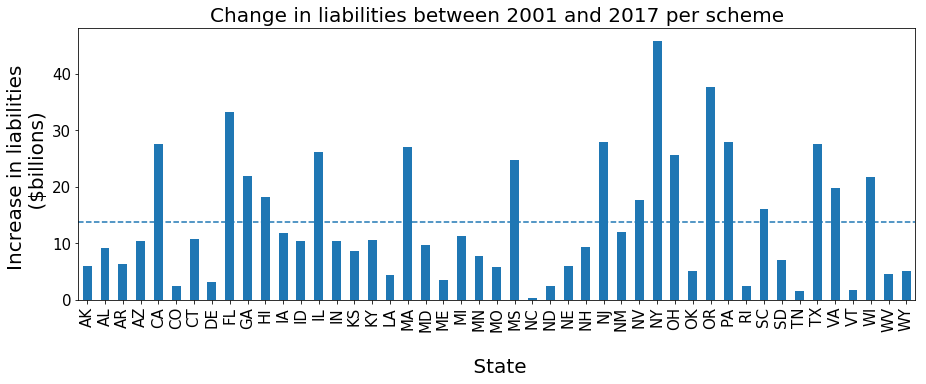

In [11]:
num_schemes = pd.DataFrame(pensions_17.StateAbbrev.value_counts())
num_schemes.sort_index(inplace=True)
liabs_01_17['Num_schemes'] = num_schemes['StateAbbrev']
liabs_01_17['Change_per_scheme'] = liabs_01_17['Liabs_change'] / liabs_01_17['Num_schemes']

liabs_01_17.Change_per_scheme.plot(kind='bar', figsize=(15,5))
plt.title("Change in liabilities between 2001 and 2017 per scheme", fontsize=20)
plt.ylabel("Increase in liabilities \n ($billions)", fontsize=20)
plt.xlabel("\n State", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.axhline(liabs_01_17.Change_per_scheme.mean(), linestyle='dashed')
plt.show()

Though California, Illinois and Texas have experienced above average increases to their pension liability sizes, they are not the states to have seen the biggest increases per scheme - these are New York, Oregon and Florida.

## Do the pension schemes with the biggest liabilities have the worst funded ratios?

This question attempts to indicate how much trouble different pension schemes are in. Huge pension liabilities will probably be manageable if the schemes hold enough assets to pay these pensions. Schemes that have funding ratios under 1.0 do not currently have enough assets to pay their obligations, and the bigger these schemes are, the bigger the problem is.

In [12]:
# Check no NAs in funded ratio column
pen_check = pensions_2017_clean.dropna(subset=['ActFundedRatio_GASB'])
len(pensions_2017_clean) == len(pen_check)

True

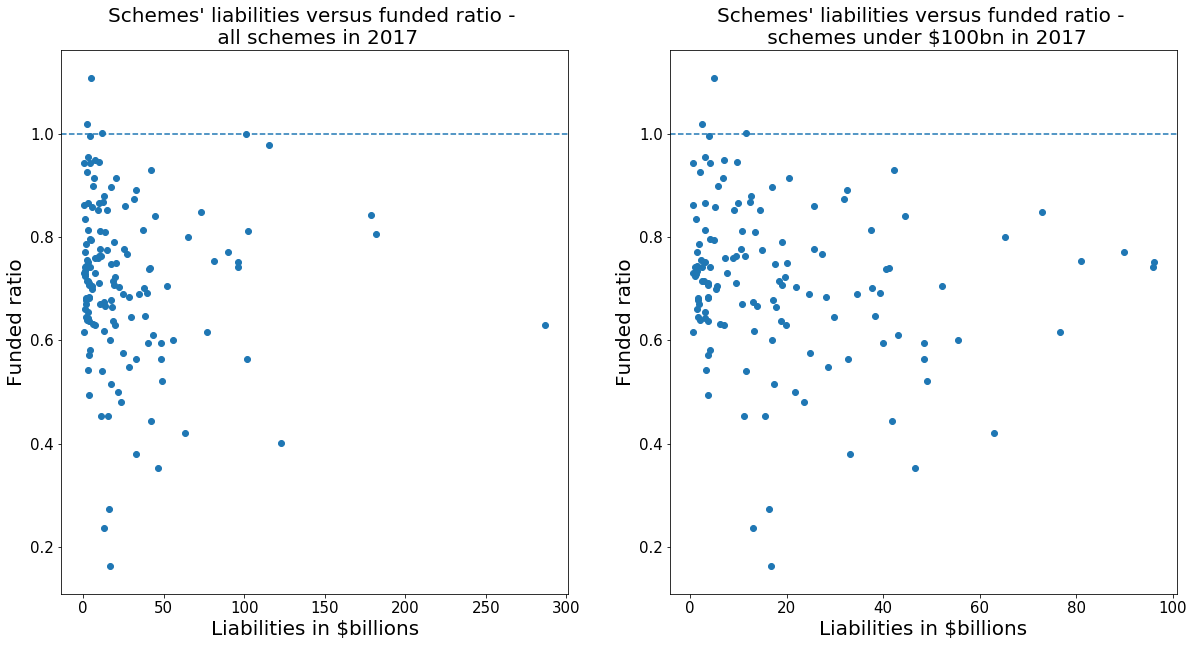

In [13]:
plt.figure(figsize=(20,10))

plt.subplot(1, 2, 1)
plt.scatter(x=pensions_2017_clean['ActLiabilities_GASB'], y=pensions_2017_clean['ActFundedRatio_GASB'])
plt.xlabel("Liabilities in $billions", fontsize=20)
plt.ylabel("Funded ratio", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Schemes' liabilities versus funded ratio - \n all schemes in 2017", fontsize=20)
plt.axhline(1, linestyle='dashed')

plt.subplot(1, 2, 2)
plt.scatter(x=pensions_2017_clean[pensions_2017_clean['ActLiabilities_GASB'] < 100]['ActLiabilities_GASB'], y=pensions_2017_clean[pensions_2017_clean['ActLiabilities_GASB'] < 100]['ActFundedRatio_GASB'])
plt.xlabel("Liabilities in $billions", fontsize=20)
plt.ylabel("Funded ratio", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Schemes' liabilities versus funded ratio - \n schemes under $100bn in 2017", fontsize=20)
plt.axhline(1, linestyle='dashed')

plt.show()

We can see that only a tiny minority of schemes are fully funded (i.e. have funded ratios over 1.0) - the majority of schemes do not have enough assets to cover their liabilities.

There is no discernable trend relating size of a scheme's liabilities to its funded ratio. This is the case even when the largest schemes are excluded, allowing us to zoom in on the smaller schemes. The answer to my question is therefore no, there is no obvious relationship between size of the pension liabilities and funded ratio.